# Hurricane Generator

In [107]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from sithom.xr import plot_units
import climada.hazard.trop_cyclone as tc
from climada.hazard.tc_tracks import TCTracks, estimate_rmw
from src.data_loading.ibtracs import katrina, time_steps, prep_for_climada
from src.constants import NO_BBOX

In [112]:
katrina()

<xarray.Dataset>
Dimensions:           (storm: 1, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [113]:
centroids = np.array(
    [
        [x, y]
        for x in np.linspace(*NO_BBOX.lat, num=50)
        for y in np.linspace(*NO_BBOX.lon, num=50)
    ]
)

In [130]:
ok = tc.compute_windfields(
    prep_for_climada(katrina()),
    centroids,
    0,  # metric="equirect"
)

In [136]:
for _ in ok:
    print(_.shape)

(360, 2500, 2)
(2500,)


Text(0.5, 0, 'Node')

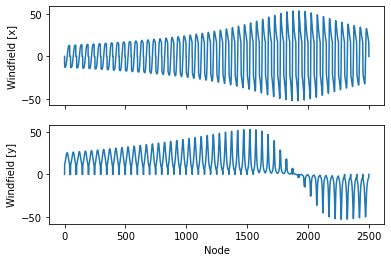

In [148]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(ok[0][50, :, 0])
axs[0].set_ylabel("Windfield [x]")
axs[1].plot(ok[0][50, :, 1])
axs[1].set_ylabel("Windfield [y]")
axs[1].set_xlabel("Node")

In [137]:
?tc.compute_windfields

In [ ]:
len(katrina().storm.values)

In [123]:
katrina().isel(storm=0).usa_r34.values.shape

(360, 4)

In [26]:
TCTracks

climada.hazard.tc_tracks.TCTracks

In [27]:
TCTracks()

## Requirements
Need to compute `time_step` variable in hours.

In [33]:
kat = katrina()

In [80]:
times = kat.time.values

In [97]:
times = kat.time.values
time_steps_list = [
    (times[:, i + 1] - times[:, i]) / np.timedelta64(1, "h") for i in range(359)
]
time_steps_list.append(np.array([np.nan for _ in range(len(times))]))
time_steps = np.array(time_steps_list).transpose()

In [98]:
len(times)

1

In [99]:
time_steps_list

[array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([1.5]),
 array([1.5]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([2.16666667]),
 array([0.83333333]),
 array([2.75]),
 array([0.25]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array

In [89]:
time_steps.shape

(1, 360)

In [92]:
kat

<xarray.Dataset>
Dimensions:           (storm: 1, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] 2005-08-23T18:00:00.0...
    lat               (storm, date_time) float32 23.1 23.25 23.4 ... nan nan nan
    lon               (storm, date_time) float32 -75.1 -75.4 -75.7 ... nan nan
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 64.0
    sid               (storm) |S13 b'2005236N23285'
    season            (storm) float32 2.005e+03
    number            (storm) int16 61
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 nan nan nan nan ... nan nan nan
    reunion_gust_per  (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_seahgt        (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_searad        (storm, date_time, quadrant) float32 nan nan ... nan nan
    storm_speed       (storm, date_time) float32 6.0 6.0 6.0 6.0 ... nan nan nan
    storm_dir         (storm, date_time) float32 298.0 299.0 302.0 ... nan nan
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [93]:
kat["time_steps"] = (["storm", "date_time"], time_steps)

In [94]:
kat

<xarray.Dataset>
Dimensions:           (storm: 1, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] 2005-08-23T18:00:00.0...
    lat               (storm, date_time) float32 23.1 23.25 23.4 ... nan nan nan
    lon               (storm, date_time) float32 -75.1 -75.4 -75.7 ... nan nan
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/148)
    numobs            (storm) float32 64.0
    sid               (storm) |S13 b'2005236N23285'
    season            (storm) float32 2.005e+03
    number            (storm) int16 61
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    ...                ...
    reunion_gust_per  (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_seahgt        (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_searad        (storm, date_time, quadrant) float32 nan nan ... nan nan
    storm_speed       (storm, date_time) float32 6.0 6.0 6.0 6.0 ... nan nan nan
    storm_dir         (storm, date_time) float32 298.0 299.0 302.0 ... nan nan
    time_steps        (storm, date_time) float64 3.0 3.0 3.0 3.0 ... nan nan nan
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [66]:
time_steps.shape

(1, 359)

In [65]:
id_arr = np.zeros(arr.shape[0])
id_arr[np.flatnonzero(np.diff(arr[:, 0]) < 0) + 1] = 256
a0 = id_arr.cumsum() + arr[:, 0]
range_arr = np.arange(a0[0], a0[-1] + 1)
out = np.full((range_arr.shape[0], arr.shape[1]), np.nan)
out[np.in1d(range_arr, a0)] = arr
idx = np.flatnonzero(~np.in1d(range_arr, a0))
out = np.insert(arr, idx - np.arange(idx.size), np.nan, axis=0)

NameError: name 'arr' is not defined

In [55]:
times.shape

(1, 360)

In [100]:
times

array([['2005-08-23T18:00:00.000039936', '2005-08-23T21:00:00.000039936',
        '2005-08-24T00:00:00.000039936', '2005-08-24T03:00:00.000039936',
        '2005-08-24T06:00:00.000039936', '2005-08-24T09:00:00.000039936',
        '2005-08-24T12:00:00.000039936', '2005-08-24T15:00:00.000039936',
        '2005-08-24T18:00:00.000039936', '2005-08-24T21:00:00.000039936',
        '2005-08-25T00:00:00.000039936', '2005-08-25T03:00:00.000039936',
        '2005-08-25T06:00:00.000039936', '2005-08-25T09:00:00.000039936',
        '2005-08-25T12:00:00.000039936', '2005-08-25T15:00:00.000039936',
        '2005-08-25T18:00:00.000039936', '2005-08-25T21:00:00.000039936',
        '2005-08-25T22:30:00.000039936', '2005-08-26T00:00:00.000039936',
        '2005-08-26T03:00:00.000039936', '2005-08-26T06:00:00.000039936',
        '2005-08-26T09:00:00.000039936', '2005-08-26T12:00:00.000039936',
        '2005-08-26T15:00:00.000039936', '2005-08-26T18:00:00.000039936',
        '2005-08-26T21:00:00.000039936